In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('finalData.csv')
data.head()

,Unnamed: 0,Unnamed: 0.1,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Category,Age_Category,BMI,BMI_Category
0,0,0,1,A Dijiang,M,24.0,180.000000,80.000000,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None,Ball based,20-29,24.7,18.5-24.9
1,1,1,2,A Lamusi,M,23.0,170.000000,60.000000,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None,Combative,20-29,20.8,18.5-24.9
2,2,2,3,Gunnar Nielsen Aaby,M,24.0,174.916667,75.181818,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,None,Ball based,20-29,24.6,18.5-24.9
3,3,3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Combative,30-39,NaN,>35
4,4,4,5,Christine Jacoba Aaftink,F,21.0,185.000000,82.000000,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None,Other,20-29,24.0,18.5-24.9


In [3]:
def total_participants(x):
    return len(x)
def medallists(x):
    x = x[x!='None']
    return len(x)

aggs = [total_participants, medallists]
grouped_data = data.groupby(['Year','Season','NOC'],as_index=False)['Medal'].agg(aggs)
grouped_data.head()

total_participants  medallists
Year Season NOC                                
1896 Summer AUS                   5           3
            AUT                   8           5
            DEN                  15           6
            FRA                  26          11
            GBR                  25           9

In [4]:
# Top countries in terms of participants count
# Countries in the order of the most participants, in the reverse order of medals
grouped_data = grouped_data.sort_values(["Year", "Season",'total_participants','medallists'], ascending = (True, True,False,True))
grouped_data.head(20)

total_participants  medallists
Year Season NOC                                
1896 Summer GRE                 148          48
            GER                  94          32
            USA                  27          20
            FRA                  26          11
            GBR                  25           9
            HUN                  18           6
            DEN                  15           6
            SUI                   8           3
            AUT                   8           5
            SWE                   5           0
            AUS                   5           3
            ITA                   1           0
1900 Summer FRA                1071         235
            GBR                 146         108
            USA                 135          63
            GER                 103          45
            BEL                 100          43
            NED                  73          27
            SUI                  52          21
            ITA                  36           5

In [5]:
# Top countries in terms of number of medals 
# Countries in the order of most medals, in reverse order no. of participants
grouped_data = grouped_data.sort_values(["Year", "Season",'medallists','total_participants'], ascending = (True, True,False,True))
grouped_data.head(20)

total_participants  medallists
Year Season NOC                                
1896 Summer GRE                 148          48
            GER                  94          32
            USA                  27          20
            FRA                  26          11
            GBR                  25           9
            DEN                  15           6
            HUN                  18           6
            AUT                   8           5
            AUS                   5           3
            SUI                   8           3
            ITA                   1           0
            SWE                   5           0
1900 Summer FRA                1071         235
            GBR                 146         108
            USA                 135          63
            GER                 103          45
            BEL                 100          43
            NED                  73          27
            SUI                  52          21
            NOR                  29           9

In [6]:
# From this itself, we can see how countries with more participants win more medals in most cases
# Checking the overall statistic
grouped_data2 = grouped_data.reset_index()
print('Correlation between the total number of participants and the number of medals own by countries:')
print('Overall : ',grouped_data2[['total_participants','medallists']].corr().iloc[0,-1])
print('Summer Olympics : ',grouped_data2[grouped_data2['Season']=='Summer'][['total_participants','medallists']].corr().iloc[0,-1])
print('Winter Olympics : ',grouped_data2[grouped_data2['Season']=='Winter'][['total_participants','medallists']].corr().iloc[0,-1])

# 0.84 - That is a significant positive correlation
# More significant in summer olympics that the winter edition

Correlation between the total number of participants and the number of medals own by countries:
Overall :  0.8432522391395428
Summer Olympics :  0.8471896054847033
Winter Olympics :  0.777042076407489


In [7]:
# Taking Top 10 countries in terms of medals to limit to the significant ones
selected_data = grouped_data.groupby(["Year", "Season"]).head(10)
selected_data.head(20)

total_participants  medallists
Year Season NOC                                
1896 Summer GRE                 148          48
            GER                  94          32
            USA                  27          20
            FRA                  26          11
            GBR                  25           9
            DEN                  15           6
            HUN                  18           6
            AUT                   8           5
            AUS                   5           3
            SUI                   8           3
1900 Summer FRA                1071         235
            GBR                 146         108
            USA                 135          63
            GER                 103          45
            BEL                 100          43
            NED                  73          27
            SUI                  52          21
            NOR                  29           9
            DEN                  36           9
            AUS                   6           6

In [8]:
# For top 10 countries
# Correlation table
corr_data = selected_data.groupby(['Year','Season'])[['total_participants','medallists']].corr().iloc[0::2,-1].to_frame('Correlation').reset_index()
corr_data = corr_data.drop(['level_2'], axis=1)
corr_data.head()

,Year,Season,Correlation
0,1896,Summer,0.975835
1,1900,Summer,0.945772
2,1904,Summer,0.997706
3,1906,Summer,0.865793
4,1908,Summer,0.971557


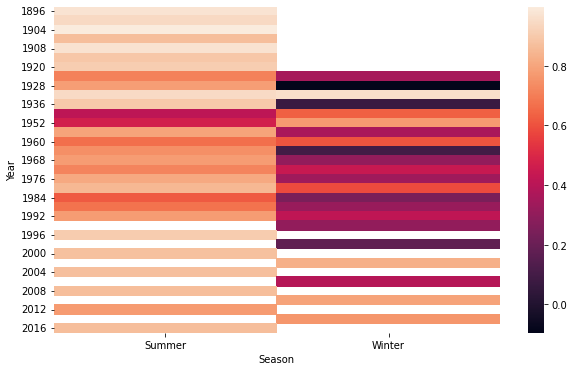

In [9]:
# Heatmap 
import seaborn as sns 
import matplotlib.pyplot as plt
df = corr_data.pivot('Year', 'Season', 'Correlation')
plt.rcParams["figure.figsize"] = (10,6)
ax = sns.heatmap(df)
plt.show()
# Can notice a high correlation, especially in Summer Olympics which is the most prominent season amongst the two
# The countries that got more medals also had more athletes that qualified to compete in that Olympic season

In [10]:
# Correlation table - overall
corr_data = grouped_data.groupby(['Year','Season'])[['total_participants','medallists']].corr().iloc[0::2,-1].to_frame('Correlation').reset_index()
corr_data = corr_data.drop(['level_2'], axis=1)
corr_data.head()

,Year,Season,Correlation
0,1896,Summer,0.975052
1,1900,Summer,0.944331
2,1904,Summer,0.997504
3,1906,Summer,0.897763
4,1908,Summer,0.961097


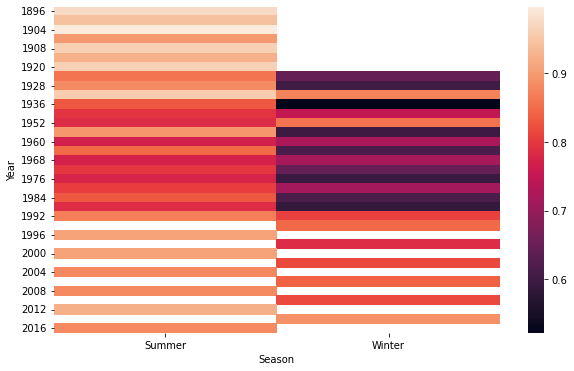

In [11]:
# Heatmap 
import seaborn as sns 
import matplotlib.pyplot as plt
df = corr_data.pivot('Year', 'Season', 'Correlation')
plt.rcParams["figure.figsize"] = (10,6)
ax = sns.heatmap(df)
plt.show()
# Can notice a high correlation, especially in Summer Olympics which is the most prominent season amongst the two
# The countries that got more medals also had more athletes that qualified to compete in that Olympic season

In [11]:
# Effect more pronounced in the dominant top ten countries

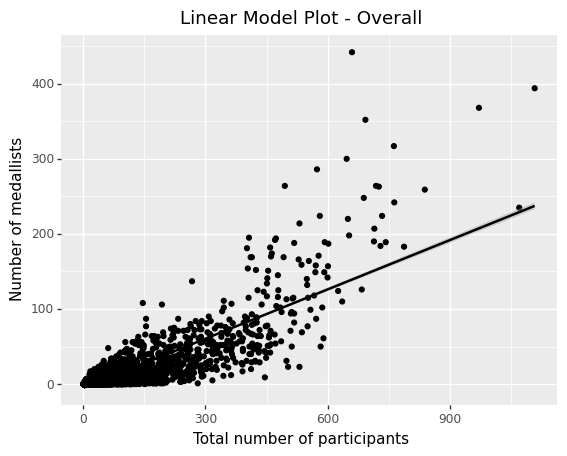

<ggplot: (8760032975013)>

In [13]:
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap, geom_line, ggtitle, geom_smooth, xlab, ylab, scale_x_datetime, scale_x_discrete, theme
(ggplot(grouped_data, aes('total_participants', 'medallists'))) + geom_point() +  geom_smooth(aes(group = 1),method='lm')\
+ xlab('Total number of participants') \
+ ylab('Number of medallists') \
+ ggtitle("Linear Model Plot - Overall")

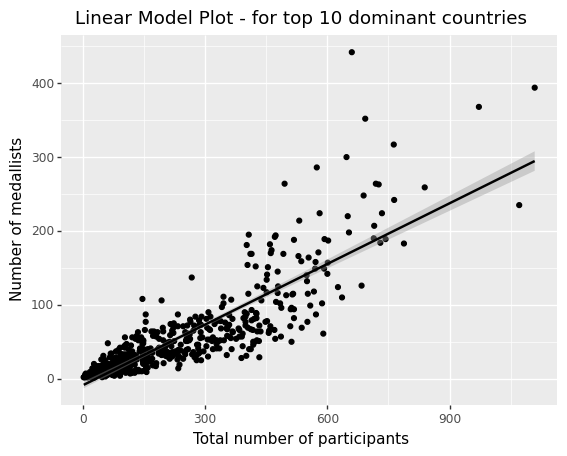

<ggplot: (8760031366113)>

In [14]:
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap, geom_line, ggtitle, geom_smooth, xlab, ylab, scale_x_datetime, scale_x_discrete, theme
(ggplot(selected_data, aes('total_participants', 'medallists'))) + geom_point() +  geom_smooth(aes(group = 1),method='lm')\
+ xlab('Total number of participants') \
+ ylab('Number of medallists') \
+ ggtitle("Linear Model Plot - for top 10 dominant countries")

In [ ]:
# Linear model even fits better in the top 10 case